<a href="https://colab.research.google.com/github/brunoodon/mvp_sprintII/blob/main/MVP_Sprint_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
url_adult = 'https://raw.githubusercontent.com/brunoodon/mvp_sprintII/main/adult_usa.data'
dataset = pd.read_csv(url_adult)
array = dataset.values
X = array[:,[0,2,4,10,11,12]]
#padronizando os dados numéricos:
avg = np.mean(X)
std = np.std(X)
X_std = (X - std) / std
#normalizando os dados, pois muitos deram números negativos:
max = np.max(X_std)
min = np.min(X_std)
X_norm = (X_std - min) / (max - min)
y = array[:,1]
X_norm_train, X_norm_test, y_train, y_test, = train_test_split(X_norm, y, test_size=0.20, random_state=7)
display(X_norm)
#dataset.head(50)

array([[2.6267844453948785e-05, 0.052209698222879304,
        8.755948151318324e-06, 0.0014642639446893506, 0.0,
        2.6941378927125688e-05],
       [3.367672365890711e-05, 0.056112830494946815,
        8.755948151318324e-06, 0.0, 0.0, 8.755948151318324e-06],
       [2.5594309980771882e-05, 0.1452450150029804,
        6.061810258604518e-06, 0.0, 0.0, 2.6941378927125688e-05],
       ...,
       [3.9064999444334724e-05, 0.10231662182049635,
        6.061810258604518e-06, 0.0, 0.0, 2.6941378927125688e-05],
       [1.4817758409922844e-05, 0.1357104610006702,
        6.061810258604518e-06, 0.0, 0.0, 1.3470689463562844e-05],
       [3.502379260526711e-05, 0.193928760258772, 6.061810258604518e-06,
        0.01011918192502888, 0.0, 2.6941378927125688e-05]], dtype=object)

Aplicando problemas de Classificação com outros datasets

KNN: 0.660818 (0.013181)
CART: 0.528984 (0.008797)
NB: 0.405212 (0.039407)
SVM: 0.697788 (0.011574)


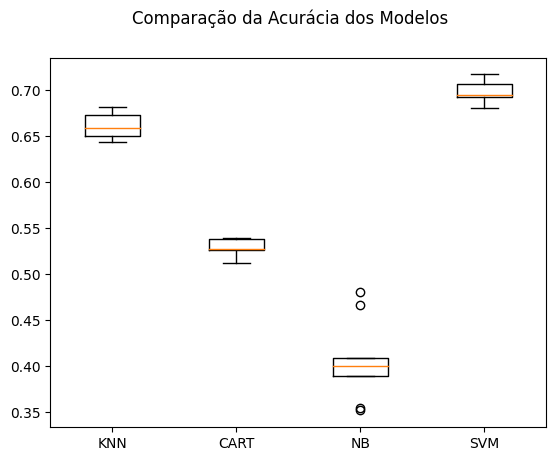

In [3]:
num_particoes = 10
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7)
np.random.seed(7)
models = []
results = []
names = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
for name, model in models:
  cv_results = cross_val_score(model, X_norm_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

